In [1]:
import math
import torch
import hess
import matplotlib.pyplot as plt
from hess.nets import Transformer
from hess.data import data_loader
import numpy as np
import sklearn.datasets as datasets
import hess.utils as utils

In [2]:
def twospirals(n_points, noise=.2, random_state=88):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [25]:
X, Y = twospirals(500, noise=1.5)
noisy_x = torch.FloatTensor(X)
noisy_y = torch.FloatTensor(Y).unsqueeze(-1)

X, Y = twospirals(500, noise=0.5)
sep_x = torch.FloatTensor(X)
sep_y = torch.FloatTensor(Y).unsqueeze(-1)

use_cuda = torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(2)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    noisy_x, noisy_y = noisy_x.cuda(), noisy_y.cuda()
    sep_x, sep_y = sep_x.cuda(), sep_y.cuda()

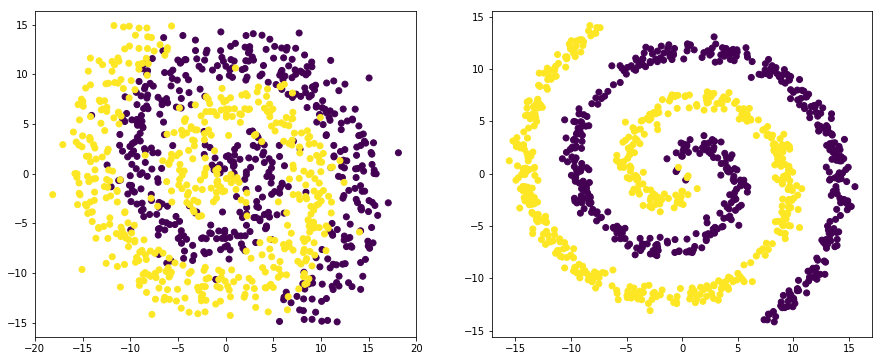

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].scatter(noisy_x[:, 0].cpu(), noisy_x[:, 1].cpu(), c=noisy_y.squeeze().cpu())
ax[1].scatter(sep_x[:, 0].cpu(), sep_x[:, 1].cpu(), c=sep_y.squeeze().cpu())

In [27]:
noise_model = Transformer(noisy_x, noisy_y, net=hess.nets.MoonNet, n_hidden=5, hidden_size=20,
                     activation=torch.nn.ELU(), bias=True)

In [28]:
sep_model = Transformer(sep_x, sep_y, net=hess.nets.MoonNet, n_hidden=5, hidden_size=20,
                     activation=torch.nn.ELU(), bias=True)

In [29]:
if use_cuda:
    noise_model = noise_model.cuda()
    sep_model = sep_model.cuda()

In [30]:
%pdb

Automatic pdb calling has been turned OFF


In [31]:
noise_model.train_net(print_loss=True, lr=0.01, iters=5000,
                 loss_func=torch.nn.BCEWithLogitsLoss())

tensor(0.7125, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6844, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6620, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6513, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6527, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6454, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6392, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6400, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6418, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6399, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6354, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6316, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6304, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6305, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6288, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6252, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.2094, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2098, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2097, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2088, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2073, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2059, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2050, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2054, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2060, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2066, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2069, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2067, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2062, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2054, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2046, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1953, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1965, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1983, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2007, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2033, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2045, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2030, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1986, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1940, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1921, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1934, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1960, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1972, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1959, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1932, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1917, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1871, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1879, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1881, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1859, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1878, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1855, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1864, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1857, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1851, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1853, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1844, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1849, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1836, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1847, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1829, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1840, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1818, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1816, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1816, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1799, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1809, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1783, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1805, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1772, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1796, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1765, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1786, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1762, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1774, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1760, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1763, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1757, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1646, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1639, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1630, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1633, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1638, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1644, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1652, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1658, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1674, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1719, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1836, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2006, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2179, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1955, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1767, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2117, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1621, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1610, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1612, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1607, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1606, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1601, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1597, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1598, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1592, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1592, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1587, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1588, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1582, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1582, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1579, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1577, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1465, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1464, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1462, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1464, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1475, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1529, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1757, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2467, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.3306, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2810, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2001, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.3043, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2639, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2445, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2176, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1499, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1510, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1488, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1479, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1481, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1466, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1476, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1467, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1453, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1452, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1443, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1446, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1434, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1432, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1426, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1274, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1300, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1355, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1492, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1587, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1618, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1527, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1721, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2110, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1920, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1963, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2523, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2570, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2277, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1963, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2275, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1324, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1301, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1312, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1310, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1304, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1288, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1290, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1281, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1281, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1269, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1274, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1261, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1258, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1254, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1254, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1244, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1117, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1115, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1113, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1110, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1108, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1106, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1103, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1101, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1098, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1096, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1094, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1092, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1090, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1087, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1085, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1083, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1185, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1185, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1176, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1159, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1150, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1152, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1144, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1138, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1125, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1117, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1119, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1119, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1097, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1094, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1100, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1092, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1085, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1223, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1237, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1213, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1003, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0986, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1160, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1310, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1492, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1074, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1079, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1543, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1423, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1240, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1144, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1450, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0923, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0919, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0915, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0911, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0908, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0904, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0901, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0898, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0895, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0892, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0888, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0886, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0883, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0880, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0877, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0874, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0815, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0795, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0784, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0787, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0792, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0808, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0842, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0925, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0915, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0916, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0842, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0819, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0847, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0951, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0992, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0943, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0999, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0940, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1044, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1135, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1072, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1132, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0925, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0974, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0929, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0978, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1190, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1077, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0978, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1415, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1502, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1324, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1716, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1185, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1679, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2437, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1948, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1782, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1839, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1537, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1536, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1780, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1860, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1589, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1482, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1304, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1770, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1890, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1799, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1800, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1324, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1824, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1342, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1449, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1268, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1132, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1144, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1101, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1089, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0951, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1016, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0938, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0987, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0711, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0663, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0643, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0673, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0632, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0677, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0684, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0616, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0690, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0706, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0648, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0691, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0662, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0681, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0663, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0608, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0522, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0521, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0521, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0522, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0541, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0566, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0628, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0682, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0785, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0804, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0827, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0966, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1108, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1272, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1192, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0665, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0609, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0630, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0530, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0523, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0548, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0568, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0611, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0608, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0584, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0569, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0742, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0960, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1099, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0701, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.2042, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2628, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1842, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2152, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2118, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2525, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2026, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1893, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1807, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1650, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1542, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1272, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1394, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1073, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1376, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1312, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1586, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1079, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0841, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0904, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1148, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1068, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0955, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1167, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1042, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1261, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1481, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1500, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0956, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1109, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1001, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0375, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0374, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0373, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0371, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0370, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0370, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0370, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0371, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0378, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0389, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0416, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0420, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0437, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0419, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0412, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0391, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0518, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0516, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0509, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0507, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0501, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0498, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0494, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0492, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0489, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0485, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0482, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0478, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0476, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0473, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0471, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0467, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0333, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0348, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0374, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0427, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0443, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0479, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0396, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0341, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0308, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0319, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0326, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0307, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0313, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0342, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0328, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0327, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0326, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0325, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0324, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0323, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0322, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0322, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0321, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0320, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0319, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0318, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0317, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0316, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0315, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0703, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0698, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0688, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0685, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0677, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0669, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0664, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0659, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0655, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0649, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0645, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0638, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0634, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0629, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0624, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0620, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0338, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0337, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0336, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0335, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0334, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0333, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0333, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0332, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0331, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0330, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0329, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0329, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0328, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0327, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0326, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0325, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0513, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0489, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0497, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0477, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0463, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0468, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0452, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0465, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0438, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0442, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0425, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0431, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0424, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0417, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0411, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0410, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0378, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0364, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0371, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0341, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0346, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0268, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0294, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0368, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0375, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0324, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0294, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0290, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0279, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0309, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0290, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0300, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0294, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0293, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0292, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0291, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0289, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0288, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0287, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0286, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0285, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0284, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0283, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0282, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0281, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0280, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0279, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0278, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0338, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0335, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0328, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0330, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0326, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0322, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0319, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0317, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0316, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0311, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0309, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0308, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0305, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0303, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0302, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.3842, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2430, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1893, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2053, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2114, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1758, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.3057, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2681, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1777, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1840, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1585, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1574, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1519, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1498, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1384, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1542, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0211, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0210, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0210, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0209, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0208, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0208, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0207, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0207, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0206, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0206, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0205, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0205, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0204, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0204, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0203, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0203, grad_fn=<BinaryCrossEntropyWithLogitsBac

In [32]:
sep_model.train_net(print_loss=True, lr=0.01, iters=5000,
                 loss_func=torch.nn.BCEWithLogitsLoss())

tensor(0.6984, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6610, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6297, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6258, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6297, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6167, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6123, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6163, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6160, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6097, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6036, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6021, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6019, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5982, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5938, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5903, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0074, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0074, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0073, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0073, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0072, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0072, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0071, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0071, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0070, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0070, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0070, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0069, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0069, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0069, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0068, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0068, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0055, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0055, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0055, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0055, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0055, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0055, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0050, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0050, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0050, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0050, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0049, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0030, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0030, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0030, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0029, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0029, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0029, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0028, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0028, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0028, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0027, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0027, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0027, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0026, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0026, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0026, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0026, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(4.6859e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6534e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6212e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.5894e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.5579e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.5268e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.4960e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.4655e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.4354e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.4056e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.3761e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.3469e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.3180e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.2895e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.2612e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(2.1953e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1855e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1757e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1661e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1565e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1471e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1377e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1283e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1190e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1097e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1005e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.0913e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.0823e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.0733e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.0644e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.3493e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3448e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3403e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3358e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3314e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3269e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3225e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3181e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3138e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3095e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3052e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3009e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2966e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2924e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2881e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(9.2749e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.2501e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.2251e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1997e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1749e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1494e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1245e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1002e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0758e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0514e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0272e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0022e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.9784e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.9540e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.9304e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(6.7939e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.7784e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.7626e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.7472e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.7315e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.7165e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.7012e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.6859e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.6704e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.6553e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.6398e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.6241e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.6093e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.5942e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.5791e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(5.1858e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1752e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1653e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1547e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1445e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1341e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1238e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1140e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1037e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.0935e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.0835e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.0732e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.0633e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.0538e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.0430e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(4.1025e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0949e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0876e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0798e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0726e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0655e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0580e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0508e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0431e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0359e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0290e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0215e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0147e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0076e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.0005e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(3.2782e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2726e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2674e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2620e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2570e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2515e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2467e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2413e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2359e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2307e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2255e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2205e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2152e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2103e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.2053e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(2.7001e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6963e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6926e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6883e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6844e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6800e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6764e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6724e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6685e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6645e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6604e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6562e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6523e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6485e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.6451e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(2.2511e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2479e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2448e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2411e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2385e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2359e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2324e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2296e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2266e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2235e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2207e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2180e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2148e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2118e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.2085e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.9058e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9030e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9009e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8981e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8960e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8937e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8910e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8884e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8860e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8837e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8816e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8790e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8767e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8744e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.8719e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.6228e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6208e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6189e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6172e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6153e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6134e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6113e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6096e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6076e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6052e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6037e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6016e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.5997e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.5979e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.5963e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.4026e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.4010e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3996e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3982e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3965e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3951e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3934e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3916e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3898e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3881e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3863e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3848e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3832e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3819e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.3804e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.2138e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2124e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2113e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2100e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2089e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2077e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2065e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2046e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2034e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2025e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.2014e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.1996e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.1978e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.1965e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.1951e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.0508e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0497e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0485e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0474e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0467e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0452e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0444e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0431e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0418e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0405e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0397e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0384e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0374e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0363e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.0351e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(9.1321e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1225e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1094e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.1023e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0963e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0892e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0796e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0689e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0617e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0558e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0486e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0367e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0260e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0176e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(9.0105e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(8.0855e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0784e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0712e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0665e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0581e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0486e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0438e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0379e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0295e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0188e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0116e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(8.0009e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.9926e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.9878e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.9806e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(7.1844e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1737e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1701e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1630e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1546e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1487e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1391e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1332e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1272e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1236e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1141e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1081e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.1010e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.0950e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(7.0902e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(6.4132e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.4108e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.4084e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.4025e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3953e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3894e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3810e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3751e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3703e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3643e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3608e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3524e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3464e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3429e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(6.3381e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(5.7457e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7397e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7314e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7278e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7254e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7183e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7147e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7087e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.7063e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.6992e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.6932e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.6897e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.6825e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.6777e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.6742e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(5.1699e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1664e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1628e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1580e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1521e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1509e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1461e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1425e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1354e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1282e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1258e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1223e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1163e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1103e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(5.1056e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(4.6538e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6514e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6478e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6431e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6371e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6359e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6347e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6312e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6264e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6216e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6180e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6145e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6133e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6109e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.6061e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(4.2128e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.2092e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.2044e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.2020e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.2020e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1949e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1913e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1889e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1865e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1794e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1770e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1710e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1698e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1639e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(4.1627e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(3.8027e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7979e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7932e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7920e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7908e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7860e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7860e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7836e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7789e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7765e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7729e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7705e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7681e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7645e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.7622e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(3.4570e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4534e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4498e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4475e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4439e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4415e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4391e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4367e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4344e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4320e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4272e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4212e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4189e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4177e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.4165e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(3.1316e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1316e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1280e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1280e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1256e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1244e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1185e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1185e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1137e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1101e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1065e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1030e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1018e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.1006e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(3.0994e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(2.8348e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8336e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8324e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8288e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8276e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8252e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8228e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8193e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8157e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8133e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8097e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8097e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8073e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8049e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.8026e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(2.5713e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5642e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5642e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5642e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5606e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5570e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5558e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5546e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5534e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5522e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5499e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5475e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5451e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5439e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.5415e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(2.3508e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3472e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3448e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3424e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3400e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3389e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3389e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3365e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3353e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3329e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3305e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3281e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3269e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3246e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.3198e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(2.1457e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1457e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1445e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1434e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1434e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1422e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1410e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1410e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1386e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1374e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1326e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1314e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1302e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1279e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2.1279e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.9562e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9538e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9526e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9514e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9514e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9502e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9491e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9491e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9455e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9431e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9407e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9407e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9383e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9371e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.9359e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.7869e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7857e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7857e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7857e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7845e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7845e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7834e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7834e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7822e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7822e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7822e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7810e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7786e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7774e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.7774e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

tensor(1.6403e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6391e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6379e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6367e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6343e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6343e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6343e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6332e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6308e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6308e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6308e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6308e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6284e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6260e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1.6260e-07, grad_fn=<BinaryCrossEntropyWithLogitsBackwa

## Look at Spectra of Both Models

In [33]:
n_par = sum(p.numel() for p in noise_model.net.parameters())

In [35]:
noise_hessian = torch.zeros(n_par, n_par).cpu()
for pp in range(n_par):
    base_vec = torch.zeros(n_par).unsqueeze(0)
    base_vec[0, pp] = 1.

    base_vec = utils.unflatten_like(base_vec, noise_model.net.parameters())
    utils.eval_hess_vec_prod(base_vec, noise_model.net.parameters(),
                            net=noise_model.net,
                            criterion=torch.nn.BCEWithLogitsLoss(),
                            inputs=noisy_x, targets=noisy_y)
    if pp == 0:
        output = utils.gradtensor_to_tensor(noise_model.net, include_bn=True)
        noise_hessian = torch.zeros(output.nelement(), output.nelement())
        noise_hessian[:, pp] = output
    noise_hessian[:, pp] = utils.gradtensor_to_tensor(noise_model.net, include_bn=True).cpu()


In [38]:
sep_hessian = torch.zeros(n_par, n_par).cpu()
for pp in range(n_par):
    base_vec = torch.zeros(n_par).unsqueeze(0)
    base_vec[0, pp] = 1.

    base_vec = utils.unflatten_like(base_vec, sep_model.net.parameters())
    utils.eval_hess_vec_prod(base_vec, sep_model.net.parameters(),
                            net=sep_model.net,
                            criterion=torch.nn.BCEWithLogitsLoss(),
                            inputs=sep_x, targets=sep_y)
    if pp == 0:
        output = utils.gradtensor_to_tensor(sep_model.net, include_bn=True)
        sep_hessian = torch.zeros(output.nelement(), output.nelement())
        sep_hessian[:, pp] = output
    sep_hessian[:, pp] = utils.gradtensor_to_tensor(sep_model.net, include_bn=True).cpu()
